In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import jieba
from imageio import imread
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('conment-content_all.csv', index_col=0)
df.head(10)

,content_time,star,comment-content
0,2020-12-01 21:04:12,推荐,这才第一集，嫪毐的一个肾就没了，可还行？赵姬表示很亏[裂开]
1,2020-12-03 22:58:50,还行,张鲁一对着朱珠喊“母亲”，我后背发凉。
2,2020-12-01 20:43:49,力荐,从《裂变》一集不落的追到现在，也是数年的老粉了，在此期间，思想几多变化，对于大秦帝国系列要传...
3,2020-12-01 21:00:00,还行,比大秦帝国，差点儿意思。
4,2020-12-02 21:19:00,推荐,道服化好用心，演员除开赵姬都很给力，就不明白一点，张鲁一长相气质完全没有嬴政的feel，目前...
5,2020-12-01 21:13:28,很差,因一星被很多第四部粉丝豆邮恶意攻击。别人要接受你们的分数，否则就是异教徒。磨皮发白的滤镜和军...
6,2020-12-01 22:11:41,很差,我觉得张鲁一的长相和气质不适合演秦始皇，太出戏了，让他去演刘邦吧（不是说张鲁一不好，他演吴老...
7,2020-12-01 20:59:47,力荐,好看，一个段奕宏我就入戏了
8,2020-12-02 11:54:44,还行,跟前面几部，尤其是第一二部比起来，审美、剧情、服化道和节奏统统都不是一个档次的，变成了“戏说...
9,2020-12-01 21:52:57,还行,失望！应该让丁黑导演


In [3]:
print('删除之前的记录数', df.shape)
df.drop_duplicates(subset=['content_time', 'comment-content'], inplace=True, keep='first')
print('删除后的记录数', df.shape)

删除之前的记录数 (220, 3)
删除后的记录数 (216, 3)


In [4]:
df['content_day'] = df['content_time'].str[8:-9].astype(int)
df['hour'] = df['content_time'].str[11:-6].astype(int)
df.head(20)

,content_time,star,comment-content,content_day,hour
0,2020-12-01 21:04:12,推荐,这才第一集，嫪毐的一个肾就没了，可还行？赵姬表示很亏[裂开],1,21
1,2020-12-03 22:58:50,还行,张鲁一对着朱珠喊“母亲”，我后背发凉。,3,22
2,2020-12-01 20:43:49,力荐,从《裂变》一集不落的追到现在，也是数年的老粉了，在此期间，思想几多变化，对于大秦帝国系列要传...,1,20
3,2020-12-01 21:00:00,还行,比大秦帝国，差点儿意思。,1,21
4,2020-12-02 21:19:00,推荐,道服化好用心，演员除开赵姬都很给力，就不明白一点，张鲁一长相气质完全没有嬴政的feel，目前...,2,21
5,2020-12-01 21:13:28,很差,因一星被很多第四部粉丝豆邮恶意攻击。别人要接受你们的分数，否则就是异教徒。磨皮发白的滤镜和军...,1,21
6,2020-12-01 22:11:41,很差,我觉得张鲁一的长相和气质不适合演秦始皇，太出戏了，让他去演刘邦吧（不是说张鲁一不好，他演吴老...,1,22
7,2020-12-01 20:59:47,力荐,好看，一个段奕宏我就入戏了,1,20
8,2020-12-02 11:54:44,还行,跟前面几部，尤其是第一二部比起来，审美、剧情、服化道和节奏统统都不是一个档次的，变成了“戏说...,2,11
9,2020-12-01 21:52:57,还行,失望！应该让丁黑导演,1,21


In [5]:
def func(st):
    for i in range(1,int(len(st)/2)+1):
        for j in range(len(st)):
            if st[j:j+i] == st[j+i:j+2*i]:
                k = j + i
                while st[k:k+i] == st[k+i:k+2*i] and k<len(st):   
                    k = k + i
                st = st[:j] + st[k:]    
    return st

df["comment-content"] = df["comment-content"].apply(func)
df.head(10)

,content_time,star,comment-content,content_day,hour
0,2020-12-01 21:04:12,推荐,这才第一集，嫪毐的一个肾就没了，可还行？赵姬表示很亏[裂开],1,21
1,2020-12-03 22:58:50,还行,张鲁一对着朱珠喊“母亲”，我后背发凉。,3,22
2,2020-12-01 20:43:49,力荐,从《裂变》一集不落的追到现在，也是数年的老粉了，在此期间，思想几多变化，对于大秦帝国系列要传...,1,20
3,2020-12-01 21:00:00,还行,比大秦帝国，差点儿意思。,1,21
4,2020-12-02 21:19:00,推荐,道服化好用心，演员除开赵姬都很给力，就不明白一点，张鲁一长相气质完全没有嬴政的fel，目前没...,2,21
5,2020-12-01 21:13:28,很差,因一星被很多第四部粉丝豆邮恶意攻击。别人要接受你们的分数，否则就是异教徒。磨皮发白的滤镜和军...,1,21
6,2020-12-01 22:11:41,很差,我觉得张鲁一的长相和气质不适合演秦始皇，太出戏了，让他去演刘邦吧（不是说张鲁一不好，他演吴老...,1,22
7,2020-12-01 20:59:47,力荐,好看，一个段奕宏我就入戏了,1,20
8,2020-12-02 11:54:44,还行,跟前面几部，尤其是第一二部比起来，审美、剧情、服化道和节奏统都不是一个档次的，变成了“戏说”...,2,11
9,2020-12-01 21:52:57,还行,失望！应该让丁黑导演,1,21


content_day
1     15
2     20
3     27
4     79
5     33
6      8
7      4
8      5
9      9
10     5
13     1
14     9
16     1
Name: content_day, dtype: int64


<module 'matplotlib.pyplot' from 'e:\\program files\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

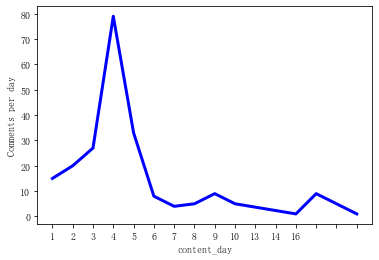

In [29]:
comment_day = df.groupby('content_day')['content_day'].count()
comment_day.plot(color='b', linewidth=3)
plt.ylabel('Comments per day')
plt.xticks(range(1, 17), comment_day.index)
print(comment_day)
plt.savefig('content_day', dpi=600)
plt

hour
0     20
1      6
2      9
3      8
4      3
5      3
6      2
7     10
8     10
9      6
10     9
11    12
12     4
13     8
14    10
15     9
16     2
17     1
18     3
19     5
20    19
21    15
22    18
23    24
Name: hour, dtype: int64


<module 'matplotlib.pyplot' from 'e:\\program files\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

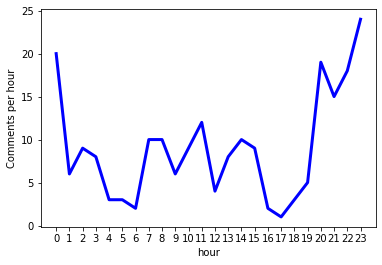

In [9]:
comment_hour = df.groupby('hour')['hour'].count()
comment_hour.plot(color='b', linewidth=3)
plt.ylabel('Comments per hour')
plt.xticks(range(0,24), comment_hour.index)
print(comment_hour)
plt.savefig('hour',dpi=600)
plt

star
力荐      8
很差    119
推荐      2
较差     79
还行      8
Name: star, dtype: int64


<module 'matplotlib.pyplot' from 'e:\\program files\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

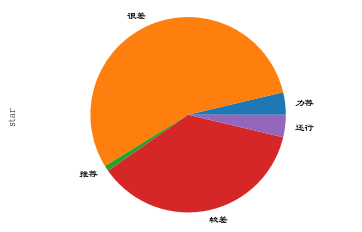

In [15]:
comment_rate = df.groupby('star')['star'].count()
percentage = comment_rate / df['star'].shape[0]
matplotlib.rc('font', family='LiSu')
percentage.plot(kind='pie')
plt.axis('equal')
plt.savefig('star', api=600)
print(comment_rate)
plt

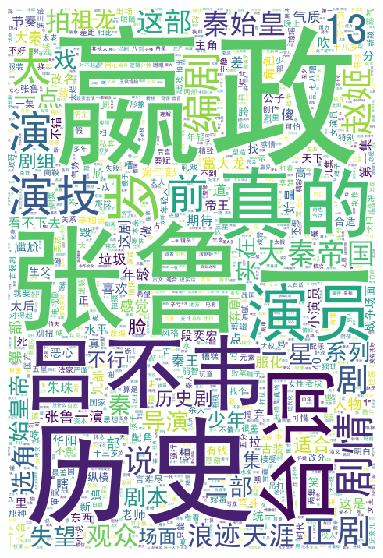

In [27]:
# 1）对评论内容进行分词操作
jieba.add_word("大秦帝国")
df["cut_after"] = df["comment-content"].apply(jieba.lcut)

# 2）读取停用词，并去除停用词
with open("stopword.txt","r",encoding="gbk") as f:
    stop = f.read()  # 返回的是一个字符串
stop = stop.split()  # 这里得到的是一个列表.split()会将空格，\n，\t进行切分，因此我们可以将这些加到停用词当中
stop = stop + [" ","\n","\t"]
df_after = df["cut_after"].apply(lambda x: [i for i in x if i not in stop])

# 3）词频统计
all_words = []
for i in df_after:
    all_words.extend(i)

word_count = pd.Series(all_words).value_counts()

# 4）绘制词云图
# Ⅰ读取背景图片
back_picture = imread("zhangluyi.png")
# Ⅱ 设置词云参数
wc = WordCloud(font_path="simhei.ttf",
               background_color="white",
               max_words=2000,
               mask=back_picture,
               max_font_size=200,
               random_state=42
              )
wc2 = wc.fit_words(word_count)
# Ⅲ 绘制词云图
plt.figure(figsize=(20,10))
plt.imshow(wc2)
plt.axis("off")
plt.show()
wc.to_file("ciyun.png")